# Machine Learning With Python

Jason Brownlee

## Contents 

Part I. Introduction
* [Welcome](#Welcome)

Part II. Lessons
* [Python Ecosystem for Machine Learning](#Python-Ecosystem-for-Machine-Learning)
* [How To Load Machine Learning Data](#How-To-Load-Machine-Learning-Data)
* [Understand Your Data With Descriptive Statistics](#Understand-Your-Data-With-Descriptive-Statistics)
* [Understand Your Data With Visualization](#Understand-Your-Data-With-Visualization)
* [Prepare Your Data For Machine Learning](#Prepare-Your-Data-For-Machine-Learning)
* [Feature Selection For Machine Learning](#Feature-Selection-For-Machine-Learning)
* [Evaluate the Performance of Machine Learning Algorithms with Resampling](#Evaluate-the-Performance-of-Machine-Learning-Algorithms-with-Resampling)
* [Machine Learning Algorithm Performance Metrics](#Machine-Learning-Algorithm-Performance-Metrics)
* [Spot-Check Classification Algorithms](#Spot-Check-Classification-Algorithms)
* [Spot-Check Regression Algorithms](#Spot-Check-Regression-Algorithms)
* [Compare Machine Learning Algorithms](#Compare-Machine-Learning-Algorithms)
* [Automate Machine Learning Workows with Pipelines](#Automate-Machine-Learning-Workows-with-Pipelines)
* [Improve Performance with Ensembles](#Improve-Performance-with-Ensembles)
* [Improve Performance with Algorithm Tuning](#Improve-Performance-with-Algorithm-Tuning)
* [Save and Load Machine Learning Models](#Save-and-Load-Machine-Learning-Models)

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

# Part I. Introduction

# Welcome

이 책은 predictive modeling이라는 machine learning sub-field에 초점이 맞춰져 있다. 이 field는 현재 industry에서 매우 유용하게 활용되고 있다.

모델이 데이터를 이해하는 목적을 가진 통계(statistics)와 다르게, <br>
predictive modeling은 설명하는 능력을 포기하면서까지 높은 prediction을 가지는 모델을 개발하는 것이 목적이다.

좀 더 넓은 머신 러닝 분야는 어떤 데이터 타입에도 쓸수 있지만, predictive modeling은 주로 tabular data에 집중한다.

# Part II. Lessions

# Python Ecosystem for Machine Learning

The philosophy of Python is captured in the Zen of Python which includes phrases like:

```
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
```

**SciPy** is an ecosystem of Python libraries for mathematics, science and engineering.

* NumPy: A foundation for SciPy that allows you to eﬃciently work with data in arrays.
* Matplotlib: Allows you to create 2D charts and plots from data.
* Pandas: Tools and data structures to organize and analyze your data.

**Scikit-learn** library is how you can develop and practice machine learning in Python.

* It is built upon and requires the SciPy ecosystem. The name scikit suggests that it is a SciPy plug-in or toolkit.
* The focus of the library is machine learning algorithms for classiﬁcation, regression, clustering and more.
* It also provides tools for related tasks such as evaluating models, tuning parameters and pre-processing data.

# How To Load Machine Learning Data

기계학습 프로젝트에서 csv 파일을 많이 사용합니다. 다양한 종류의 csv 파일 로드 방법이 있습니다.

CSV파일 고려사항

* File Header - 데이터 column 정보임. csv파일 로딩할 때 있는지 여부 명시할 것.
* Comments - csv파일에서 hash(#)로 시작하는 line은 comment임. csv파일 로딩할 때 comment character 명시할 수 있음.
* Delimiter - 데이터를 구분하기 위한 character. 보통 comma(,) 사용. Tab이나 whitespace 등으로 지정할 수 있음.
* Quotes - default quote character는 double quatation mark(")임. 다른 character도 사용 가능.

### Load CSV Files with the Python Standard Libarary

In [2]:
# Load CSV Using Python Standard Library 
import csv 
import numpy 
filename = 'data/pima-indians-diabetes.data.csv' 
raw_data = open(filename, 'r') 
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)      # header는 로드 파일에 없다고 가정.
x = list(reader) 
data = numpy.array(x).astype('float') 
print(data.shape)

(768, 9)


### Load CSV Files with NumPy

In [3]:
# Load CSV using NumPy
from numpy import loadtxt
filename = 'data/pima-indians-diabetes.data.csv'
raw_data = open(filename, 'rb')
data = loadtxt(raw_data, delimiter=",")
print(data.shape)

(768, 9)


In [7]:
# Load CSV from URL using NumPy
from numpy import loadtxt
from urllib.request import urlopen
url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
raw_data = urlopen(url)
dataset = loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(768, 9)


### Load CSV Files with Pandas

pandas의 rade_csv 함수는 매우 flexible하기 때문에 머신러닝 프로젝트에서 데이터를 로딩할 때 이 방식을 추천한다. 이 함수는 pandas.DataFrame을 리턴하는데 여기에서 데이터를 summarizing과 plotting을 곧바로 할 수 있다.

In [8]:
# Load CSV using Pandas
from pandas import read_csv
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(data.shape)

(768, 9)


In [9]:
# Load CSV using Pandas from URL
from pandas import read_csv
url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names=names)
print(data.shape)

(777, 9)


# Understand Your Data With Descriptive Statistics

### Peek at Your Data

In [10]:
# View first 20 rows
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

### Dimensions of Your Data

In [11]:
# Dimensions of your data
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
shape = data.shape
print(shape)

(768, 9)


### Data Type For Each Attribute

In [12]:
# Data Types for Each Attribute
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


### Descriptive Statistics

In [15]:
# Statistical Summary
from pandas import read_csv
from pandas import set_option
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
# set_option - for more readable
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


### Class Distribution (Classification Only)

클래스별 분포를 보고 imbalanced가 있는지 확인한다.

In [16]:
# Class Distribution
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


### Correlations Between Attributes

Correlation refers to the relationship between two variables and how they may or may not change together.

피어슨 상관계수(Pearson's Correlation Coefficient) 
* attribute가 normal 분포를 가진다고 가정. 
* 0은 correlation이 전혀 없는 경우. 1은 full correlation인 경우.

In [17]:
# Pairwise Pearson correlations
from pandas import read_csv
from pandas import set_option
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
correlations = data.corr(method='pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


### Skew of Univariate Distributions

Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. 많은 기계학습 알고리즘들은 내재적으로 Gaussian distribution을 가정한다.

skew 임을 알면 data preparation 단계에서 수정할 수 있다. <br>
skew 값이 0이 될수록 less skew를 뜻한다.

In [18]:
# Skew for each attribute
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


# Understand Your Data With Visualization

### Univariate Plots

#### Histograms

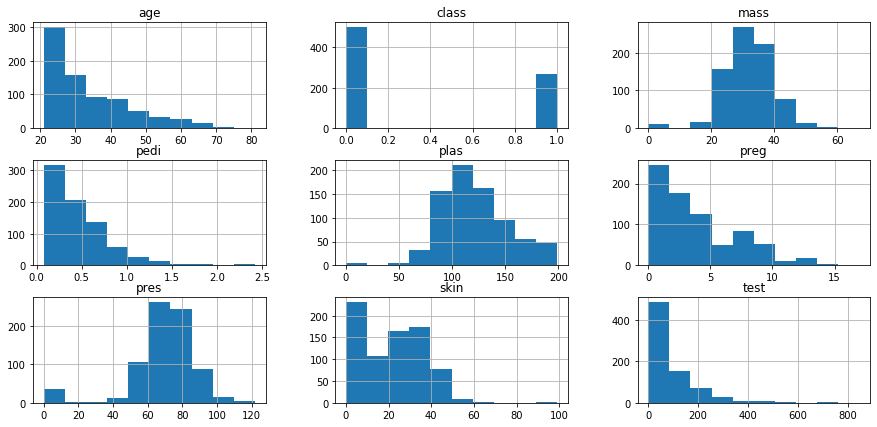

In [42]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist()
pyplot.show()

* age, pedi, test 는 exponential distribution
* mass, press, plas 는 Gaussian or nearly Gaussian distribution

many machine learning techniques assume a Gaussian univariate distribution on the input variables.

#### Density Plots

히스토그램과 함께 데이터 분포를 확인하는 방법. smooth curve를 통해 확인. 좀 더 깔끔하다.

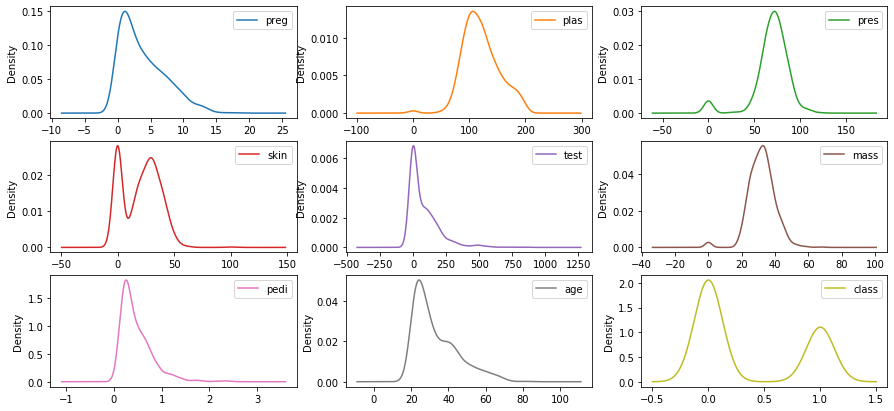

In [43]:
# Univariate Density Plots
from matplotlib import pyplot
from pandas import read_csv
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

#### Box and Whisker Plots

데이터 분포를 확인하는 또 다른 방법. <br>
Boxplot을 통해 분포를 한 눈에 볼 수 있고, line은 median (middle value), 25th와 75th percentiles (the middle 50% of the data)가 박스를 둘러싸고 있다. <br>
Whisker는 data의 spread성을 확인할 수 있고, whisker를 벗어나면 outlier로 간주할 수 있다.

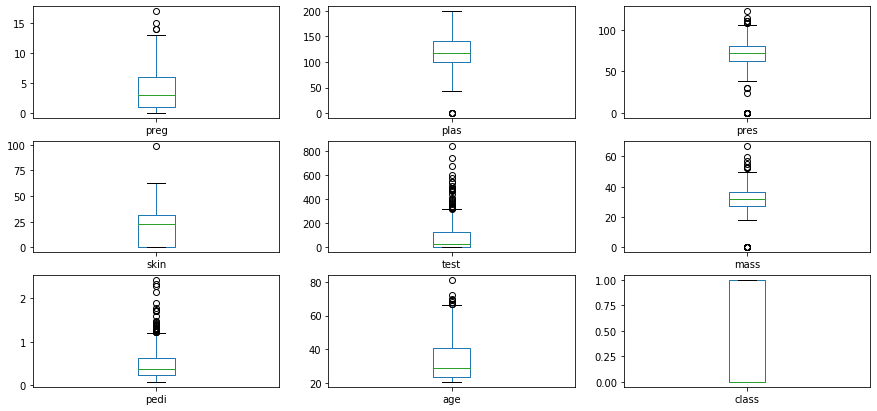

In [44]:
# Box and Whisker Plots
from matplotlib import pyplot
from pandas import read_csv
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

### Multivariate Plots

the interactions between multiple variables

#### Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables.

자질이 서로 highly correlated하면 하나는 삭제하는 것이 좋다.

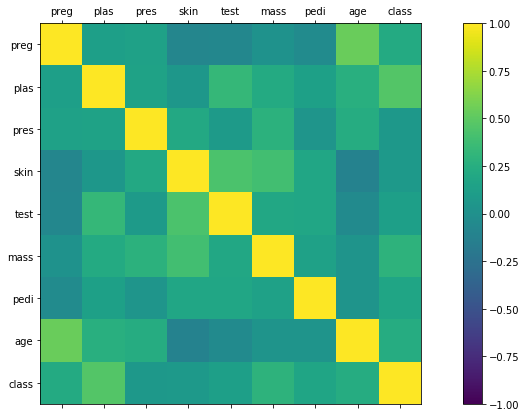

In [45]:
# Correction Matrix Plot
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

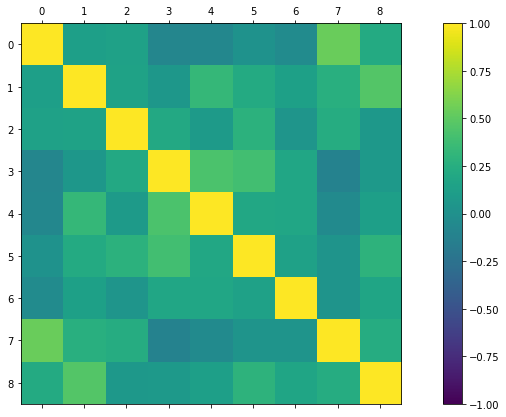

In [46]:
# Correction Matrix Plot (generic)
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

#### Scatter Plot Matrix

* A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute.
* Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.
* scatter plot을 뿌리고 이쁜 패턴이 나온다면 삭제 대상이다.

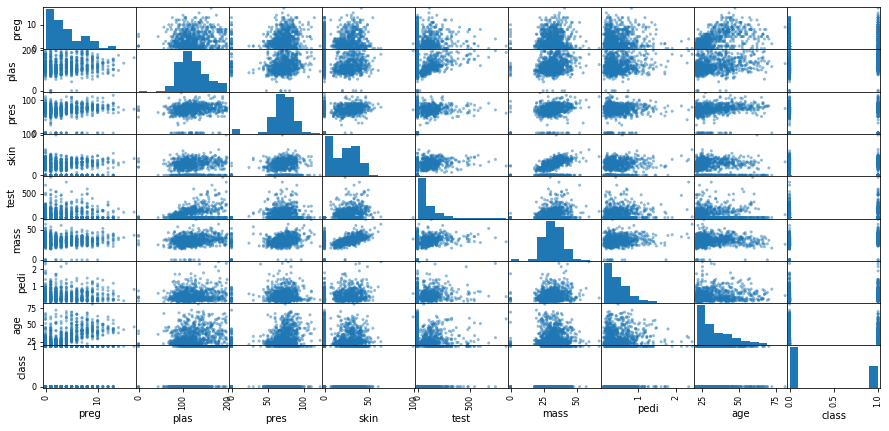

In [48]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
filename = "data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
scatter_matrix(data)
pyplot.show()

# Prepare Your Data For Machine Learning

### Need For Data Pre-processing

A difficulty is that different algorithms make different assumptions about your data and may require different
transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.

### Data Transforms

The scikit-learn library provides two standard idioms for transforming data.

* Fit function - to prepare the parameters of the transform once on your data 
* (Multiple) Transform function - to prepare it for modeling
* Combined Fit-And-Transform.

### Rescale Data

This is useful
for optimization algorithms in used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors.

In [50]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


### Standardize Data

Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian
distribution in the input variables and work better with rescaled data, such as linear regression,
logistic regression and linear discriminate analysis.

신경망에 유용하다. activation 함수가 보통 0을 기점으로 symetric 하게 정의되기 때문.

In [51]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


### Normalize Data

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

This pre-processing method
can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance
measures such as k-Nearest Neighbors.

In [52]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


### Binarize Data (Make Binary)

This is called binarizing your data or
thresholding your data. It can be useful when you have probabilities that you want to make crisp
values. It is also useful when feature engineering and you want to add new features that indicate
something meaningful.

In [53]:
# binarization
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection For Machine Learning

### Feature Selection

you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

* Reduces Overfitting - Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy - Less misleading data means modeling accuracy improves.
* Reduces Training Time - Less data means that algorithms train faster.

### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with
the output variable.

In [54]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4) # chi-squared statistical test, 4 of the best features
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


You can see the scores for each attribute and the 4 attributes chosen (those with the highest
scores): plas, test, mass and age. I got the names for the chosen attributes by manually
mapping the index of the 4 highest scores to the index of the attribute names.

### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [64]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


### Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique.

In [66]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: {}".format(fit.explained_variance_ratio_))
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features. <br>
The larger the
score, the more important the attribute.

In [67]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.109 0.221 0.102 0.089 0.081 0.131 0.124 0.143]


# Evaluate the Performance of Machine Learning Algorithms with Resampling

You need to know how well your algorithms perform on unseen data. The best way to evaluate
the performance of an algorithm would be to make predictions for new data to which you
already know the answers. The second best way is to use clever techniques from statistics called
resampling methods that allow you to make accurate estimates for how well your algorithm will
perform on new data.

### Evaluate Machine Learning Algorithms

* Train and Test Sets.
* k-fold Cross Validation.
* Leave One Out Cross Validation.
* Repeated Random Test-Train Splits.

### Split into Train and Test Sets

In [74]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
# random seed for reproducible
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 75.591%


### K-fold Cross Validation

In [72]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.951% (4.841%)


When summarizing performance measures, it is a good practice to summarize the
distribution of the measures, in this case assuming a Gaussian distribution of performance (a
very reasonable assumption) and recording the mean and standard deviation.

### Leave One Out Cross Validation

샘플 개수만큼 모델을 구축해야 함. 매우 비싼 계산!

In [75]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.953% (42.113%)


### Repeated Random Test-Train Splits

k-fold CV는 골고루 한 번씩 돌지만, 여기서는 랜덤으로 split하는 면에서 차이가 있다. 

In [76]:
# Evaluate using Shuffle Split Cross Validation
from pandas import read_csv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.496% (1.698%)


### What Techniques to Use When

what resampling technique to use in different circumstances.

* Generally k-fold cross validation is the gold standard for evaluating the performance of a machine learning algorithm on unseen data with k set to 3, 5, or 10.
* Using a train/test split is good for speed when using a slow algorithm and produces performance estimates with lower bias when using large datasets.
* Techniques like leave-one-out cross validation and repeated random splits can be useful intermediates when trying to balance variance in the estimated performance, model training speed and dataset size.

The best advice is to experiment and find a technique for your problem that is fast and
produces reasonable estimates of performance that you can use to make decisions. If in doubt,
use 10-fold cross validation.

# Machine Learning Algorithm Performance Metrics

여기서는 cross_val_score 함수를 활용하여 다양한 metric을 테스트한다. metric마다 best의 기준이 다른데 the largest score is best인 것도 있고 the smallest score is best인 것도 있다. 후자의 경우는 metric에 'neg'를 붙인다.

### Classification Metrics

#### Classification Accuracy

Classiffication accuracy is the number of correct predictions made as a ratio of all predictions made.

(주의- 널리 쓰이는 만큼 misused가 있다) It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. (micro-averaged 이기 때문이다)

In [77]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.048)


#### Logarithmic Loss

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the condence of the prediction.

In [3]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.047)


Smaller logloss is better with 0 representing a perfect logloss. (참고 - the
measure is inverted to be ascending when using the cross val score() function.)

#### Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification
problems. The AUC represents a model's ability to discriminate between positive and negative
classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
and specificity. A binary classification problem is really a trade-off between sensitivity and
specificity.

* Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.
* Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

In [5]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.823 (0.041)


#### Confusion Matrix

The confusion matrix is a handy presentation of the accuracy of a model with two or more
classes.

In [6]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


#### Classification Report

In [7]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



### Regression Metrics

#### Mean Absolute Error

The Mean Absolute Error (or MAE) is the sum of the absolute dierences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).

In [8]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -4.005 (2.084)


A value of 0 indicates no error or perfect predictions. Like logloss, this metric is inverted by
the cross val score() function.

#### Mean Squared Error

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE).

In [10]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -34.705 (45.574)


#### R^2 Metric

The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.
This is a value between 0 and 1 for no-fit and perfect fit respectively.

In [12]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.203 (0.595)


You can see the predictions have a poor fit to the actual values with a value closer to zero and less than 0.5.

# Spot-Check Classification Algorithms

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem.

### Algorithm Spot-Checking

What algorithms should I spot-check on my dataset?

* Try a mixture of algorithm representations (e.g. instances and trees).
* Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).
* Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).

### Linear Machine Learning Algorithms

#### Logistic Regression

Logistic regression assumes a Gaussian distribution for the numeric input variables and can
model binary classification problems.

In [13]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7695146958304853


#### Linear Discriminant Analysis

Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass
classication. It too assumes a Gaussian distribution for the numerical input variables.

In [14]:
# LDA Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


### Nonlinear Machine Learning Algorithms

#### k-Nearest Neighbors

In [15]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


#### Naive Bayes

Naive Bayes calculates the probability of each class and the conditional probability of each class
given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption).

When working with
real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for
input variables using the Gaussian Probability Density Function.

In [16]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


#### Classification and Regression Trees

Classification and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).

In [17]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6900034176349965


#### Support Vector Machines

Support Vector Machines (or SVM) seek a line that best separates two classes. Those data
instances that are closest to the line that best separates the classes are called support vectors
and in
uence where the line is placed. SVM has been extended to support multiple classes.
Of particular importance is the use of different kernel functions via the kernel parameter.

In [18]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6510252904989747


# Spot-Check Regression Algorithms

### Linear Machine Learning Algorithms

#### Linear Regression

Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity).

In [20]:
# Linear Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.70525594452485


#### Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm).

In [21]:
# Ridge Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.07824620925929


#### LASSO Regression

The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification
of linear regression, like ridge regression, where the loss function is modified to minimize the
complexity of the model measured as the sum absolute value of the coefficient values (also called
the L1-norm).

In [22]:
# Lasso Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.46408458830232


#### ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge
Regression and LASSO regression. It seeks to minimize the complexity of the regression model
(magnitude and number of regression coefficients) by penalizing the model using both the
L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values).

In [23]:
# ElasticNet Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.164573714249762


### Nonlinear Machine Learning Algorithms

#### K-Nearest Neighbors

The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables differ).

In [24]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


#### Classification and Regression Trees

Decision trees or the Classiffication and Regression Trees (CART as they are known) use the train-
ing data to select the best points to split the data in order to minimize a cost metric. The default
cost metric for regression decision trees is the mean squared error, specied in the criterion
parameter.

In [25]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-37.487137647058816


#### Support Vector Machines

Support Vector Machines (SVM) were developed for binary classification. The technique has
been extended for the prediction real-valued problems called Support Vector Regression (SVR).

In [26]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
filename = 'data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-91.04782433324428


# Compare Machine Learning Algorithms

### Choose The Best Machine Learning Model

Each model will have different performance characteristics.

When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from different perspectives.

### Compare Machine Learning Algorithms Consistently

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.700461 (0.055741)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


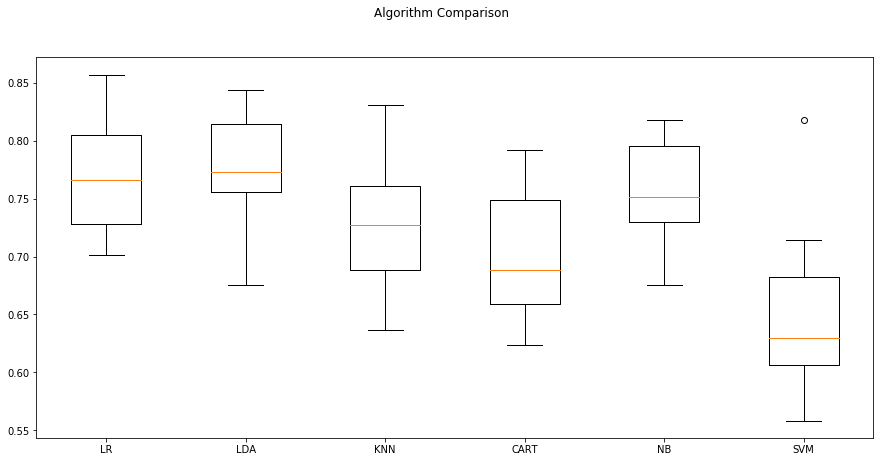

In [3]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Automate Machine Learning Workows with Pipelines

### Data Preparation and Modeling Pipeline

Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross validation procedure.

In [4]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


### Feature Extraction and Modeling Pipeline

The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained.

Importantly, all the feature extraction and the feature union occurs
within each fold of the cross validation procedure.

In [5]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


# Improve Performance with Ensembles

### Combine Models Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

* Bagging - Building multiple models (typically of the same type) from different subsamples of the training dataset.
* Boosting - Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
* Voting - Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The final output prediction is averaged
across the predictions of all of the sub-models.

#### Bagged Decision Trees

Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning.

In [6]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100 # A total of 100 trees are created.
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


#### Random Forest

Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classifiers.

Specifically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split.

The example below demonstrates using Random Forest for classification with 100 trees
and split points chosen from a random selection of 3 features.

In [8]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100 # 100 trees
max_features = 3 # a random selection of 3 features.
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773427887901572


#### Extra Trees

Extra Trees are another modification of bagging where random trees are constructed from
samples of the training dataset.

The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

In [10]:
# Extra Trees Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7681818181818182


### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a final
output prediction.

#### AdaBoost

It generally works
by weighting instances in the dataset by how easy or difficult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models.

In [11]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 30 # the construction of 30 decision trees in sequence
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


#### Stochastic Gradient Boosting

Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles.

In [12]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100 # with 100 trees.
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7681989063568012


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classifiers manually or even heuristically is difficult.

More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

In [13]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7291011619958989


# Improve Performance with Algorithm Tuning

Machine learning models are parameterized so that their behavior can be tuned for a given
problem. Models can have many parameters and finding the best combination of parameters can
be treated as a search problem.

### Machine Learning Algorithm Parameters

Algorithm tuning is a final step in the process of applied machine learning before finalizing your
model. It is sometimes called hyperparameter optimization where the algorithm parameters
are referred to as hyperparameters, whereas the coefficients found by the machine learning
algorithm itself are referred to as parameters.

Optimization suggests the search-nature of the
problem. Phrased as a search problem, you can use different search strategies to find a good and
robust parameter or set of parameters for an algorithm on a given problem.

#### Grid Search Parameter Tuning

Grid search is an approach to parameter tuning that will methodically build and evaluate a
model for each combination of algorithm parameters specified in a grid.

In [14]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27961755931297233
1.0


#### Random Search Parameter Tuning

Random search is an approach to parameter tuning that will sample algorithm parameters from
a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed
and evaluated for each combination of parameters chosen.

A total of 100 iterations are performed with uniformly random alpha
values selected in the range between 0 and 1 (the range that alpha values can take).

In [16]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.27961712703051095
0.9779895119966027


# Save and Load Machine Learning Models

### Finalize Your Model with pickle

Pickle is the standard way of serializing objects in Python.

In [17]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


### Finalize Your Model with Joblib

The Joblib library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, efficiently. This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors).

In [18]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...

# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


### Tips for Finalizing Your Model

* Python Version.
* Library Versions.

Take note of the version so that you can re-create the environment if for some reason you
cannot reload your model on another machine or another platform at a later time.